IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M1\NO_FAULT1


VARIABILE RCOU POTENZA MOTORI

In [3]:
#andiamo a prendere una potenza media di 1400 per considerare il momento il cui inizia/finisce il volo
rcou_m1 = pd.read_csv("RCOU.csv")
rcou_m1 = rcou_m1.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m1 = rcou_m1[((rcou_m1['C9'] >= 1350) & (rcou_m1['C10'] >= 1350) & (rcou_m1['C11'] >= 1350) & (rcou_m1['C12'] >= 1350) & (rcou_m1['C13'] >= 1350) & (rcou_m1['C14']>= 1350))]

pd.set_option('display.max_rows',700)
display(rcou_m1)

,TimeUS,C9,C10,C11,C12,C13,C14
710,22664152,1360,1375,1382,1352,1371,1363
711,22676651,1382,1369,1360,1390,1364,1387
720,22771304,1452,1411,1456,1406,1473,1386
721,22782035,1507,1358,1409,1465,1479,1393
722,22792632,1519,1355,1384,1497,1465,1420
...,...,...,...,...,...,...,...
4966,68488846,1553,1460,1514,1503,1422,1584
4967,68499144,1536,1469,1506,1501,1397,1594
4968,68509358,1542,1448,1511,1482,1419,1565
4969,68523070,1572,1386,1463,1509,1415,1550


In [4]:
#xkf utilizzato per fare poi il confronto con i valori di roll, pitch e yaw in att
xkf1_m1 = pd.read_csv("XKF1_0.csv")
xkf1_m1 = xkf1_m1.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m1 = xkf1_m1[((xkf1_m1['TimeUS'] >= 22664152) & (xkf1_m1['TimeUS'] <= 68533079))]
print(xkf1_m1)

        TimeUS  Roll  Pitch    Yaw
712   22675051  0.01  -0.44  13.24
713   22685153  0.03  -0.40  13.24
714   22695762 -0.03  -0.45  13.23
715   22705793 -0.04  -0.52  13.22
716   22715779  0.03  -0.40  13.23
...        ...   ...    ...    ...
4968  68486359 -4.46   1.19   5.63
4969  68496743 -4.40   1.35   5.58
4970  68507280 -4.34   1.52   5.53
4971  68521132 -4.14   1.73   5.49
4972  68531134 -3.95   1.91   5.45

[4261 rows x 4 columns]


In [5]:
att_m1 = pd.read_csv("ATT.csv")
att_m1 = att_m1.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m1 = att_m1[((att_m1['TimeUS'] >= 22664152) & (att_m1['TimeUS'] <= 68533079))]
print(att_m1)

        TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
712   22675940     0.00  0.01      0.00  -0.44   13.23  13.24
713   22686733     0.00  0.03      0.00  -0.40   13.23  13.24
714   22696746     0.00 -0.03      0.00  -0.45   13.23  13.23
715   22706870     0.00 -0.04      0.00  -0.52   13.23  13.22
716   22716835     0.00  0.03      0.00  -0.40   13.23  13.23
...        ...      ...   ...       ...    ...     ...    ...
4968  68488238    -1.70 -4.46     -0.22   1.19    5.99   5.63
4969  68498617    -1.59 -4.40     -0.21   1.35    5.99   5.58
4970  68508630    -1.49 -4.34     -0.20   1.52    5.99   5.53
4971  68522298    -1.39 -4.14     -0.18   1.73    5.99   5.49
4972  68532571    -1.30 -3.95     -0.17   1.91    5.99   5.45

[4261 rows x 7 columns]


In [6]:
#controllo corrispondenza valori roll, pitch, yaw
att_m1 = pd.merge_asof(att_m1, xkf1_m1, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m1)

        TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0     22675940     0.00  0.01      0.00  -0.44   13.23  13.24
1     22686733     0.00  0.03      0.00  -0.40   13.23  13.24
2     22696746     0.00 -0.03      0.00  -0.45   13.23  13.23
3     22706870     0.00 -0.04      0.00  -0.52   13.23  13.22
4     22716835     0.00  0.03      0.00  -0.40   13.23  13.23
...        ...      ...   ...       ...    ...     ...    ...
4256  68488238    -1.70 -4.46     -0.22   1.19    5.99   5.63
4257  68498617    -1.59 -4.40     -0.21   1.35    5.99   5.58
4258  68508630    -1.49 -4.34     -0.20   1.52    5.99   5.53
4259  68522298    -1.39 -4.14     -0.18   1.73    5.99   5.49
4260  68532571    -1.30 -3.95     -0.17   1.91    5.99   5.45

[4261 rows x 7 columns]


In [7]:
#elettricita' che scorre nel motore considerato, al momento ne consideriamo solo 1
esc_0_m1 = pd.read_csv("ESC_0.csv")
esc_0_m1 = esc_0_m1.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_0_m1 = esc_0_m1[((esc_0_m1['TimeUS'] >= 22664152) & (esc_0_m1['TimeUS'] <= 68533079))]
esc_0_m1=esc_0_m1.rename(columns={"RPM": "RPM(ESC_0)", "Curr": "Curr(ESC_0)"})
print(esc_0_m1)
esc_1_m1 = pd.read_csv("ESC_1.csv")
esc_1_m1 = esc_1_m1.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_1_m1 = esc_1_m1[((esc_1_m1['TimeUS'] >= 22664152) & (esc_1_m1['TimeUS'] <= 68533079))]
esc_1_m1=esc_1_m1.rename(columns={"RPM": "RPM(ESC_1)", "Curr": "Curr(ESC_1)"})

esc_2_m1 = pd.read_csv("ESC_2.csv")
esc_2_m1 = esc_2_m1.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_2_m1 = esc_2_m1[((esc_2_m1['TimeUS'] >= 22664152) & (esc_2_m1['TimeUS'] <= 68533079))]
esc_2_m1=esc_2_m1.rename(columns={"RPM": "RPM(ESC_2)", "Curr": "Curr(ESC_2)"})

esc_3_m1 = pd.read_csv("ESC_3.csv")
esc_3_m1 = esc_3_m1.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_3_m1 = esc_3_m1[((esc_3_m1['TimeUS'] >= 22664152) & (esc_3_m1['TimeUS'] <= 68533079))]
esc_3_m1=esc_3_m1.rename(columns={"RPM": "RPM(ESC_3)", "Curr": "Curr(ESC_3)"})

esc_4_m1 = pd.read_csv("ESC_4.csv")
esc_4_m1 = esc_4_m1.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_4_m1 = esc_4_m1[((esc_4_m1['TimeUS'] >= 22664152) & (esc_4_m1['TimeUS'] <= 68533079))]
esc_4_m1=esc_4_m1.rename(columns={"RPM": "RPM(ESC_4)", "Curr": "Curr(ESC_4)"})

esc_5_m1 = pd.read_csv("ESC_5.csv")
esc_5_m1 = esc_5_m1.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_5_m1 = esc_5_m1[((esc_5_m1['TimeUS'] >= 22664152) & (esc_5_m1['TimeUS'] <= 68533079))]
esc_5_m1=esc_5_m1.rename(columns={"RPM": "RPM(ESC_5)", "Curr": "Curr(ESC_5)"})



       TimeUS  RPM(ESC_0)  Curr(ESC_0)
68   22742780        3495         2.16
69   22845457        4097         2.65
70   22959904        4696         3.34
71   23059012        5180         4.33
72   23167332        5753         4.29
73   23272089        6060         3.92
74   23387634        6310         4.54
75   23499927        6266         4.03
76   23602066        6227         3.98
77   23709666        6214         4.15
78   23821462        6291         4.02
79   23922931        6084         4.91
80   24140073        6394         5.41
81   24241826        6617         4.74
82   24355612        6651         4.40
83   24458193        6428         4.01
84   24563045        6225         3.88
85   24677142        6148         4.24
86   24780143        6059         3.99
87   24894895        6102         3.90
88   25000816        5953         4.13
89   25111147        6179         3.85
90   25216093        6107         3.97
91   25322971        6011         3.83
92   25431084        5965

In [8]:
#valori di accelerazione e del giroscopio
imu_2_m1 = pd.read_csv("IMU_2.csv")
imu_2_m1 = imu_2_m1.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m1 = imu_2_m1[((imu_2_m1['TimeUS'] >= 22664152) & (imu_2_m1['TimeUS'] <= 68533079))]
print(imu_2_m1)

         TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
2772   22666080  0.003473 -0.071788 -0.003969 -0.288769  0.070756  -9.615868
2773   22668252  0.022022 -0.018390 -0.004186 -0.273620  0.065257  -9.677919
2774   22670635  0.042835  0.047712  0.003529 -0.285327  0.087617  -9.837013
2775   22675772  0.041332  0.027353 -0.005676 -0.265016  0.116323  -9.899507
2776   22681012 -0.047680 -0.088542 -0.020646 -0.149086  0.106717  -9.691211
...         ...       ...       ...       ...       ...       ...        ...
19275  68522130  0.284771  0.282203 -0.021080 -0.704096  2.665057 -11.796820
19276  68524886  0.340421  0.269412 -0.034364 -0.749058  2.835196 -12.038420
19277  68527023  0.308373  0.309697 -0.031700 -0.718123  2.934844 -12.225820
19278  68530131  0.320004  0.317270 -0.023956 -0.648460  3.013909 -12.377950
19279  68532323  0.333978  0.296047 -0.020278 -0.633987  3.028393 -12.458560

[16508 rows x 7 columns]


In [9]:
#sincronizzazione dei tempi tra att e imu_2
m1_nofault = pd.merge_ordered(imu_2_m1,att_m1)
m1_nofault=m1_nofault.fillna(method="ffill").fillna(method="bfill")
print(m1_nofault)

         TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ  \
0      22666080  0.003473 -0.071788 -0.003969 -0.288769  0.070756  -9.615868   
1      22668252  0.022022 -0.018390 -0.004186 -0.273620  0.065257  -9.677919   
2      22670635  0.042835  0.047712  0.003529 -0.285327  0.087617  -9.837013   
3      22675772  0.041332  0.027353 -0.005676 -0.265016  0.116323  -9.899507   
4      22675940  0.041332  0.027353 -0.005676 -0.265016  0.116323  -9.899507   
...         ...       ...       ...       ...       ...       ...        ...   
20764  68524886  0.340421  0.269412 -0.034364 -0.749058  2.835196 -12.038420   
20765  68527023  0.308373  0.309697 -0.031700 -0.718123  2.934844 -12.225820   
20766  68530131  0.320004  0.317270 -0.023956 -0.648460  3.013909 -12.377950   
20767  68532323  0.333978  0.296047 -0.020278 -0.633987  3.028393 -12.458560   
20768  68532571  0.333978  0.296047 -0.020278 -0.633987  3.028393 -12.458560   

       DesRoll  Roll  DesPitch  Pitch  

In [10]:
#sincronizzazione dei tempi tra la tabella ottenuta precedentemente e esc_0 (corrente che passa nel motore)
m1_nofault = pd.merge_ordered(m1_nofault, esc_0_m1)
m1_nofault = pd.merge_ordered(m1_nofault, esc_1_m1)
m1_nofault = pd.merge_ordered(m1_nofault, esc_2_m1)
m1_nofault = pd.merge_ordered(m1_nofault, esc_3_m1)
m1_nofault = pd.merge_ordered(m1_nofault, esc_4_m1)
m1_nofault = pd.merge_ordered(m1_nofault, esc_5_m1)
m1_nofault=m1_nofault.fillna(method="ffill").fillna(method="bfill")
m1_nofault = pd.merge_ordered(m1_nofault, rcou_m1)
m1_nofault=m1_nofault.fillna(method="ffill").fillna(method="bfill")

print(m1_nofault)

         TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ  \
0      22664152  0.003473 -0.071788 -0.003969 -0.288769  0.070756  -9.615868   
1      22666080  0.003473 -0.071788 -0.003969 -0.288769  0.070756  -9.615868   
2      22668252  0.022022 -0.018390 -0.004186 -0.273620  0.065257  -9.677919   
3      22668569  0.022022 -0.018390 -0.004186 -0.273620  0.065257  -9.677919   
4      22670635  0.042835  0.047712  0.003529 -0.285327  0.087617  -9.837013   
...         ...       ...       ...       ...       ...       ...        ...   
27405  68527023  0.308373  0.309697 -0.031700 -0.718123  2.934844 -12.225820   
27406  68530131  0.320004  0.317270 -0.023956 -0.648460  3.013909 -12.377950   
27407  68532323  0.333978  0.296047 -0.020278 -0.633987  3.028393 -12.458560   
27408  68532571  0.333978  0.296047 -0.020278 -0.633987  3.028393 -12.458560   
27409  68533079  0.333978  0.296047 -0.020278 -0.633987  3.028393 -12.458560   

       DesRoll  Roll  DesPitch  ...  RP

In [11]:
index_to_remove=[]
for ind in att_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
for ind in esc_0_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
for ind in esc_1_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
for ind in esc_2_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
for ind in esc_3_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
for ind in esc_4_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
for ind in esc_5_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
for ind in rcou_m1["TimeUS"]:
    if ind not in index_to_remove:
        index_to_remove.append(int(ind))
print(len(index_to_remove))
print("--------------------")
print(len(index_to_remove))

4261
4671
5082
5492
5900
6305
6717
10902
--------------------
10902


In [12]:
#aggiornamento del tempo ponendo a 0 il momento in cui il volo inizia per noi e settaggio della variabile guasto
#from datetime import timedelta
#index_to_remove=set(set(set(set(set(set(set(att_m1["TimeUS"]).add(esc_0_m1.index)).add(esc_1_m1.index)).add(esc_2_m1.index)).add(esc_3_m1.index)).add(esc_4_m1.index)).add(esc_5_m1.index)).add(rcou_m1.index)
#m1_nofault.drop(index_to_remove, axis=0, inplace=True)
m1_nofault = m1_nofault[~m1_nofault.TimeUS.isin(index_to_remove)]
m1_nofault["TimeUS"] = m1_nofault["TimeUS"] - m1_nofault.iloc[0]["TimeUS"]
m1_nofault["TimeUS"] = m1_nofault["TimeUS"].astype(int)
m1_nofault["Guasto"] = 0
print(m1_nofault)

         TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ  \
1             0  0.003473 -0.071788 -0.003969 -0.288769  0.070756  -9.615868   
2          2172  0.022022 -0.018390 -0.004186 -0.273620  0.065257  -9.677919   
4          4555  0.042835  0.047712  0.003529 -0.285327  0.087617  -9.837013   
5          9692  0.041332  0.027353 -0.005676 -0.265016  0.116323  -9.899507   
8         14932 -0.047680 -0.088542 -0.020646 -0.149086  0.106717  -9.691211   
...         ...       ...       ...       ...       ...       ...        ...   
27401  45856050  0.284771  0.282203 -0.021080 -0.704096  2.665057 -11.796820   
27404  45858806  0.340421  0.269412 -0.034364 -0.749058  2.835196 -12.038420   
27405  45860943  0.308373  0.309697 -0.031700 -0.718123  2.934844 -12.225820   
27406  45864051  0.320004  0.317270 -0.023956 -0.648460  3.013909 -12.377950   
27407  45866243  0.333978  0.296047 -0.020278 -0.633987  3.028393 -12.458560   

       DesRoll  Roll  DesPitch  ...  Cu

In [13]:
from datetime import timedelta
m1_nofault=m1_nofault.reset_index(drop=True)
m1_nofault['TimeUS'] = pd.to_datetime(m1_nofault['TimeUS'], unit='us').dt.strftime('%H:%M:%S.%f')
display(m1_nofault)

,TimeUS,GyrX,GyrY,GyrZ,AccX,AccY,AccZ,DesRoll,Roll,DesPitch,...,Curr(ESC_4),RPM(ESC_5),Curr(ESC_5),C9,C10,C11,C12,C13,C14,Guasto
0,00:00:00.000000,0.003473,-0.071788,-0.003969,-0.288769,0.070756,-9.615868,0.00,0.01,0.00,...,1.90,3348.0,1.99,1360.0,1375.0,1382.0,1352.0,1371.0,1363.0,0
1,00:00:00.002172,0.022022,-0.018390,-0.004186,-0.273620,0.065257,-9.677919,0.00,0.01,0.00,...,1.90,3348.0,1.99,1360.0,1375.0,1382.0,1352.0,1371.0,1363.0,0
2,00:00:00.004555,0.042835,0.047712,0.003529,-0.285327,0.087617,-9.837013,0.00,0.01,0.00,...,1.90,3348.0,1.99,1360.0,1375.0,1382.0,1352.0,1371.0,1363.0,0
3,00:00:00.009692,0.041332,0.027353,-0.005676,-0.265016,0.116323,-9.899507,0.00,0.01,0.00,...,1.90,3348.0,1.99,1360.0,1375.0,1382.0,1352.0,1371.0,1363.0,0
4,00:00:00.014932,-0.047680,-0.088542,-0.020646,-0.149086,0.106717,-9.691211,0.00,0.01,0.00,...,1.90,3348.0,1.99,1382.0,1369.0,1360.0,1390.0,1364.0,1387.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16503,00:00:45.856050,0.284771,0.282203,-0.021080,-0.704096,2.665057,-11.796820,-1.49,-4.34,-0.20,...,1.42,5687.0,3.29,1542.0,1448.0,1511.0,1482.0,1419.0,1565.0,0
16504,00:00:45.858806,0.340421,0.269412,-0.034364,-0.749058,2.835196,-12.038420,-1.39,-4.14,-0.18,...,1.42,5687.0,3.29,1572.0,1386.0,1463.0,1509.0,1415.0,1550.0,0
16505,00:00:45.860943,0.308373,0.309697,-0.031700,-0.718123,2.934844,-12.225820,-1.39,-4.14,-0.18,...,1.42,5687.0,3.29,1572.0,1386.0,1463.0,1509.0,1415.0,1550.0,0
16506,00:00:45.864051,0.320004,0.317270,-0.023956,-0.648460,3.013909,-12.377950,-1.39,-4.14,-0.18,...,1.42,5687.0,3.29,1572.0,1386.0,1463.0,1509.0,1415.0,1550.0,0


In [56]:
path_file = path_file.replace(r"M1\NO_FAULT1", "")
os.chdir(path_file)
m1_nofault.to_csv('m1_nofault.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

In [14]:
import math
#Function that Calculate Root Mean Square
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
     
    #Calculate square
    for i in range(0,n):
        square += (arr[i]**2)
     
    #Calculate Mean
    mean = (square / (float)(n))
     
    #Calculate Root
    root = math.sqrt(mean)
     
    return root

In [69]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
N=350
height_threshold=0.0
tabGyrX= pd.DataFrame([], columns=['Ts','<>','var','kurt','RMS','freq1','freq2','amp1','amp2'])
for i in range(int(len(m1_nofault)/350)):
    GyrX=m1_nofault["GyrX"].iloc[:(i+1*350)+1]
    mean=GyrX.mean()
    var=GyrX.var()
    kurt=GyrX.kurtosis()
    rms=rmsValue(GyrX,len(GyrX))
    yf=fft(GyrX.values)
    xf=fftfreq(N,1/350)
    peaks_index, properties = find_peaks(yf,height=height_threshold)
    #for k in range(len(peaks_index)):

    #[print("%4.4f    \t %3.4f" %(freq[peaks_index[i]], properties['peak_heights'][i])) for i in range(len(peaks_index))]
    h_max_peak_1=np.unique(properties['peak_heights'])[-1]
    index1 = np.where(properties['peak_heights'] == h_max_peak_1)[0][1]
  
    h_max_peak_2=np.unique(properties['peak_heights'])[-2]
    index2 = np.where(properties['peak_heights'] == h_max_peak_2)[0][1]

    val={'Ts':i,'<>':mean,'var':var,'kurt':kurt,'RMS':rms,'freq1':xf[index1],'freq2':xf[index2],'amp1':h_max_peak_1,'amp2':h_max_peak_2}
    tabGyrX=tabGyrX.append(val,ignore_index=True)
display(tabGyrX)


d:\Program Files\Python311\Lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\mgale\AppData\Local\Temp\ipykernel_20772\1777303485.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabGyrX=tabGyrX.append(val,ignore_index=True)
d:\Program Files\Python311\Lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\mgale\AppData\Local\Temp\ipykernel_20772\1777303485.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabGyrX=tabGyrX.append(val,ignore_index=True)
d:\Program Files\Python311\Lib\site-packages\scipy\signal\_peak_finding.py:261

,Ts,<>,var,kurt,RMS,freq1,freq2,amp1,amp2
0,0.0,-0.034370,0.019761,-0.785386,0.144520,78.0,76.0,4.020589,3.884841
1,1.0,-0.034917,0.019810,-0.801817,0.144820,88.0,86.0,4.186359,3.919004
2,2.0,-0.035273,0.019798,-0.809612,0.144867,81.0,79.0,4.410678,3.995558
3,3.0,-0.035721,0.019813,-0.821879,0.145028,86.0,84.0,4.594017,4.014788
4,4.0,-0.036275,0.019866,-0.837839,0.145349,94.0,92.0,4.730507,3.971330
5,5.0,-0.036635,0.019856,-0.845555,0.145405,74.0,72.0,4.927096,3.972665
6,6.0,-0.036972,0.019841,-0.852106,0.145439,78.0,76.0,5.122334,3.957618
7,7.0,-0.037434,0.019862,-0.864493,0.145629,88.0,86.0,5.263255,3.873946
8,8.0,-0.037917,0.019890,-0.877522,0.145852,92.0,90.0,5.386878,3.759917
9,9.0,-0.038191,0.019862,-0.880839,0.145827,80.0,78.0,5.575686,3.699033


In [39]:
t = m1_nofault["TimeUS"] #tempo in microsecondi
y = m1_nofault["Pitch"] #pitch


N = 350
f = np.linspace(0,N,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2

# plot
fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


KeyboardInterrupt: 

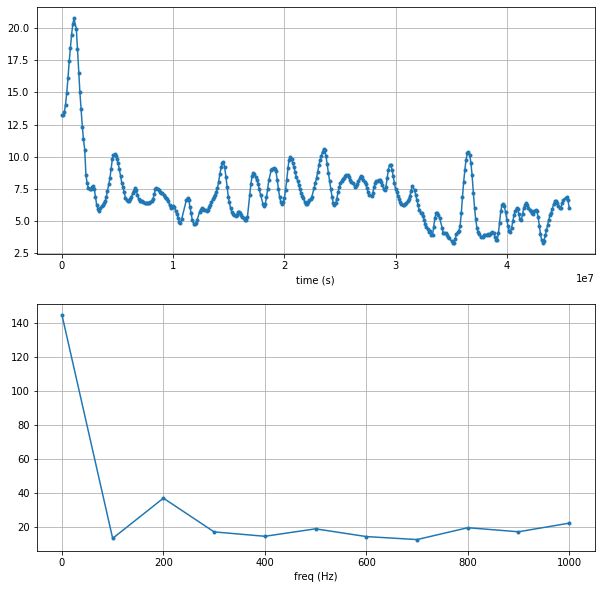

In [14]:
t = m1_nofault["TimeUS"]
y = m1_nofault["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


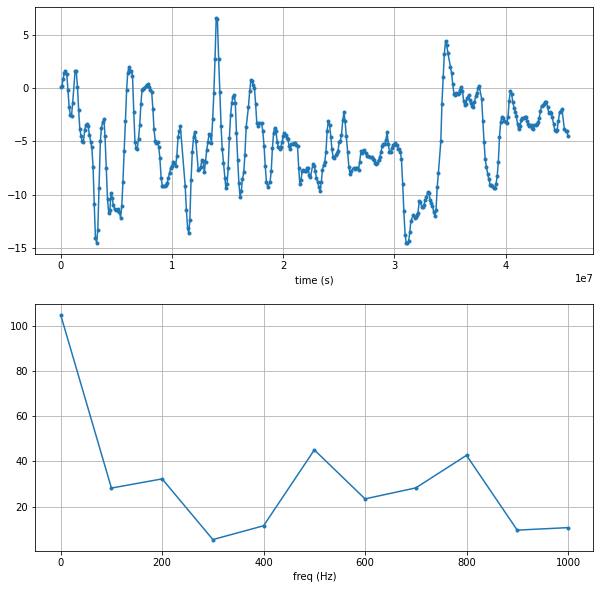

In [15]:
t = m1_nofault["TimeUS"]
y = m1_nofault["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


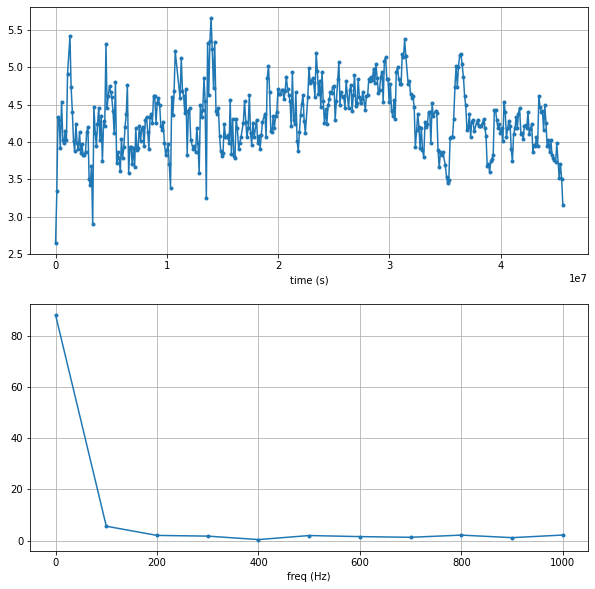

In [16]:
t = m1_nofault["TimeUS"]
y = m1_nofault["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


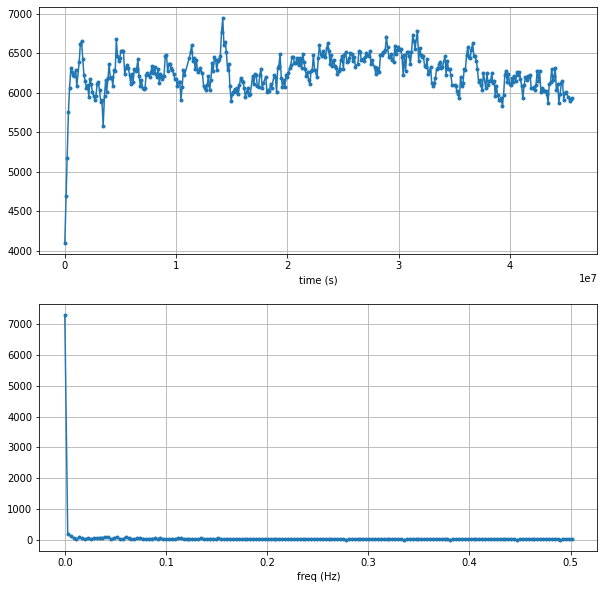

In [17]:
t = m1_nofault["TimeUS"]
y = m1_nofault["RPM"]

N = 350
f = np.linspace(0,1,N)



X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


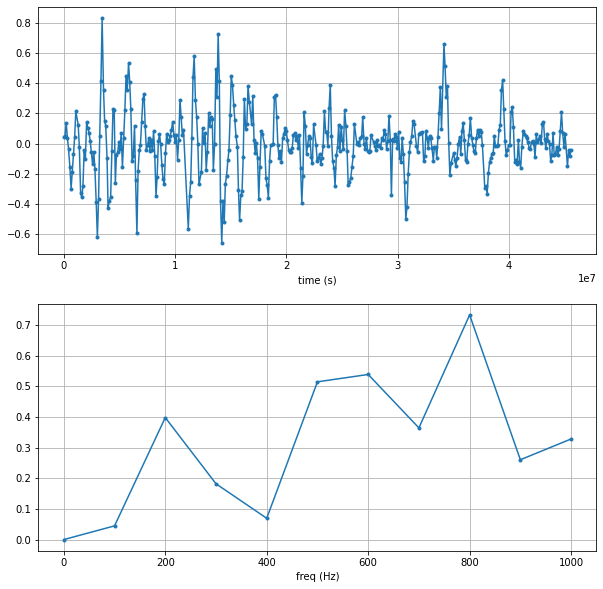

In [18]:
t = m1_nofault["TimeUS"]
y = m1_nofault["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


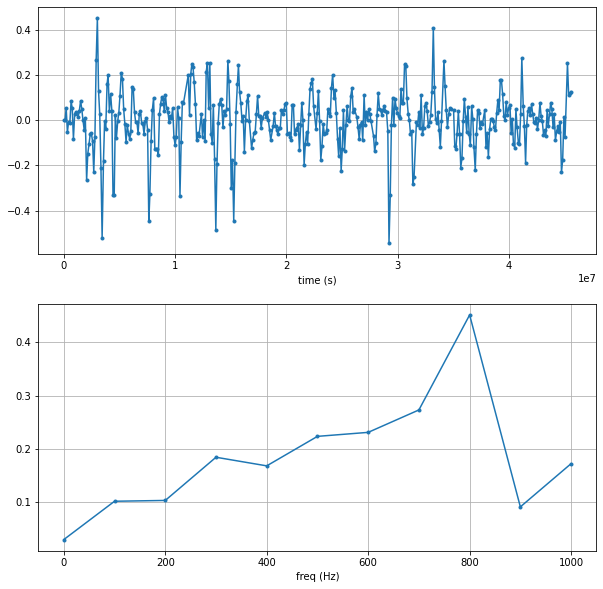

In [19]:
t = m1_nofault["TimeUS"]
y = m1_nofault["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


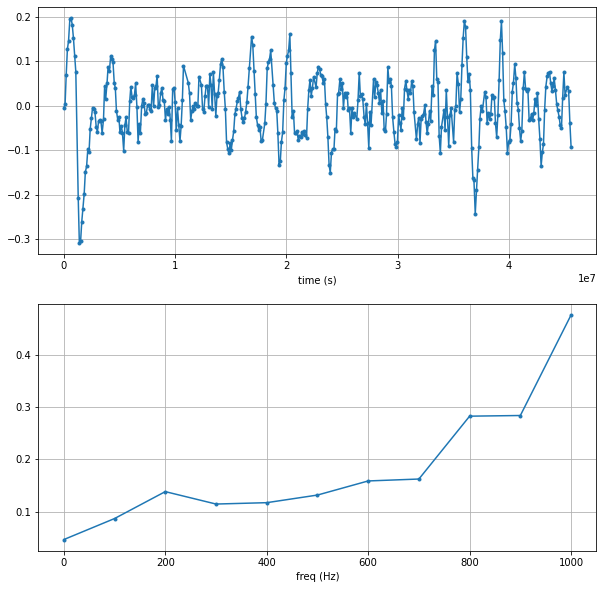

In [20]:
t = m1_nofault["TimeUS"]
y = m1_nofault["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


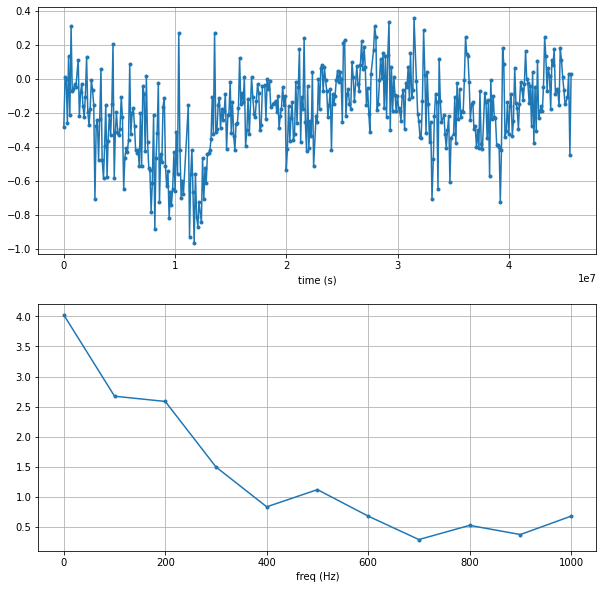

In [21]:
t = m1_nofault["TimeUS"]
y = m1_nofault["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


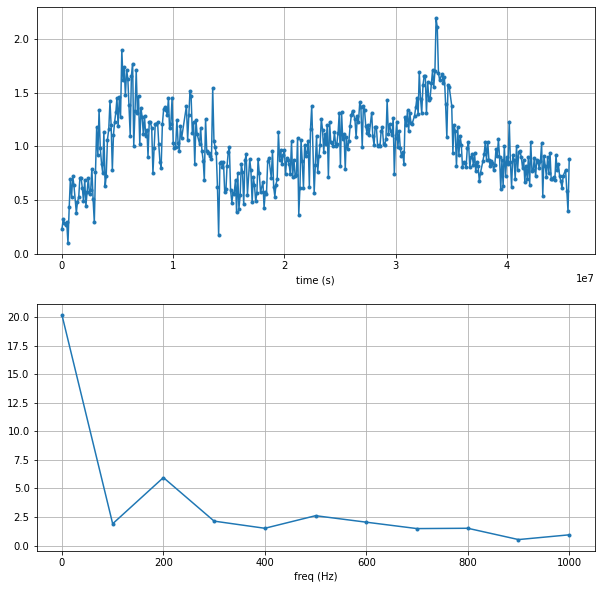

In [22]:
t = m1_nofault["TimeUS"]
y = m1_nofault["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


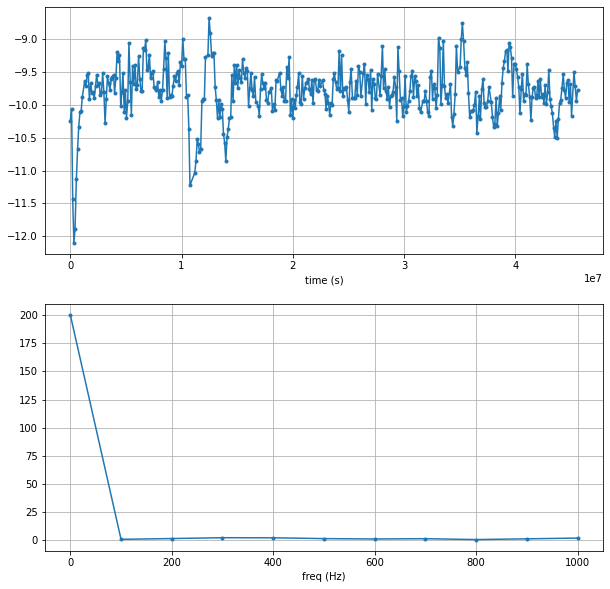

In [23]:
t = m1_nofault["TimeUS"]
y = m1_nofault["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()
